<br>
<font size='6'><b>Discrete Signal Processing and Machine Learning</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 50% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 30%>
        by Seungchul Lee<br>iSystems Design lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

In [1]:
%%html
<iframe src="https://www.youtube.com/embed/Y_0WVpn5leY" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

# 1. Discrete Signal Processing (DSP)

__Signal processing studies _signals_ and _systems_ __

Signal: 
- A detectable physical quantity... by which messages or information can be transmitted
- Signal carreis information

systems: 
- Manipulate the information carried by signals

Goals:
- Develop intuition and learn how to reason analytically about signal processing problems

# 2. Discrete Time Signals in Time Domain

A __signal__ $x[n]$ is a function that maps an independent variable to a dependent variable.

In this course, we will focus on discrete-time signals $x[n]$:
- Independent variable is an integer: $n \in \mathbb{Z}$
- Dependent variable is a real or complex number: $x[n] \in \mathbb{R} \;\text{or}\; \mathbb{C}$

(We will only consider a real number signal in this class)

<br>
<font size='4'><b>Plot real signals</b></font>

- `plot` for continuous signals in python

- `stem` for discrete signals in python

In [4]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#import sounddevice as sd
#from scipy.io import wavfile
#import scipy.ndimage.filters as ndi
#import skimage.util.noise as noise

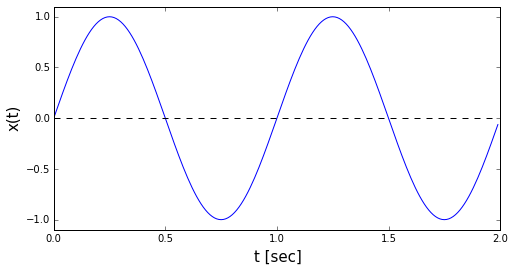

In [6]:
#t = np.array(np.arange(0,2,0.01))
t = np.arange(0,2,0.01)
x = np.sin(2*np.pi*t)

plt.figure(figsize=(8,4))
plt.plot(t,x,t,np.zeros(len(t)),'k--')
plt.ylim([-1.1, 1.1])
plt.xlabel('t [sec]',fontsize=15)
plt.ylabel('x(t)',fontsize=15)
plt.show()

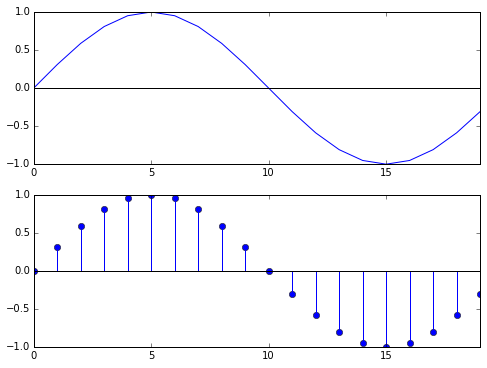

In [12]:
N = 20
n = np.arange(N)
x = np.sin(2*np.pi/N*n)

plt.figure(figsize=(8,6))
plt.subplot(211), plt.plot(n,x), plt.axis('tight'), plt.axhline(0,c = 'k')
plt.subplot(212), plt.stem(n,x), plt.axis('tight'), plt.axhline(0,c = 'k')
plt.show()

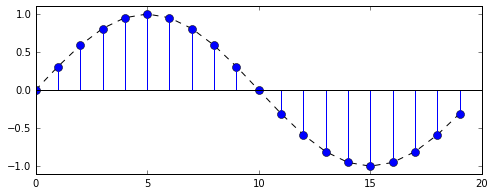

In [5]:
plt.figure(figsize=(8,3))
plt.plot(n,x,'k--')
marker,stem,base = plt.stem(n,x)
plt.setp(marker, markersize=8)
plt.axhline(0,c='k')
plt.ylim([-1.1,1.1])
plt.show()

## 2.1. Signals are vector

<br>
<font size='4'><b>Inner Product</b></font>

$$
\langle x,y \rangle = \sum \limits_{n=0}^{N-1} x[n]\, y[n]$$

- The inner product takes two signals and produces a single number


- Inner product of a signal with itself

$$\langle x,x \rangle = \sum \limits_{n=0}^{N-1} x[n]\, x[n] = \sum \limits_{n=0}^{N-1}{\lvert x[n] \rvert}^2 = \lVert x \rVert_2^2$$

- Angle between two vectors $x,y$

$$\cos \theta = \frac{\langle x,y \rangle}{\lVert x \rVert_2 \cdot \lVert y \rVert_2} $$

- Angle represents the __similarity__ of two signals


- Two vectors $x,y \in \mathbb{R}^N$ are __orthogonal__ if 

$$\langle x,y \rangle = 0$$

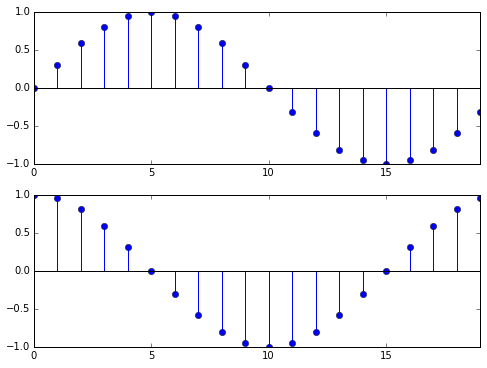

In [13]:
N = 20
n = np.arange(N)
x1 = np.sin(2*np.pi/N*n)
x2 = np.cos(2*np.pi/N*n)

plt.figure(figsize=(8,6))
plt.subplot(211), plt.stem(n,x1), plt.axis('tight'), plt.axhline(0,c='k')
plt.subplot(212), plt.stem(n,x2), plt.axis('tight'), plt.axhline(0,c='k')
plt.show()

In [7]:
print(sum(x1*x2))

-1.11022302463e-16


## 2.2. Noisy Signals in Time

<img src = "./image_files/inference_one.png" style="border:1px solid black" width = 600>

### 2.2.1. Generate Random Numbers (Noise)

In [8]:
## random number generation (1D)
m = 1000;

# uniform distribution U(0,1)
x1 = np.random.rand(m)

# uniform distribution U(a,b)
a = 1  
b = 5
x2 = a + (b-a)*np.random.rand(m)

# standard normal (Gaussian) distribution N(0,1^2)
x3 = np.random.randn(m)

# normal distribution N(5,2^2)
x4 = 5 + 2.*np.random.randn(m)

# random integers
x5 = np.random.randint(1,7,m)

### 2.2.2. Noisy (Non-stationary) Signals

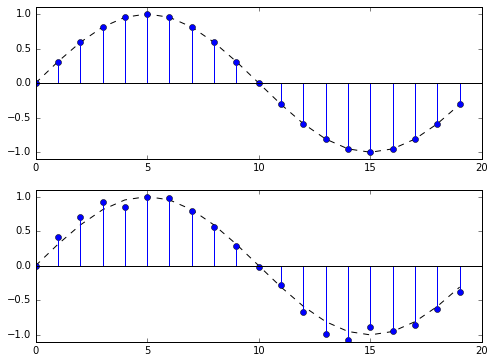

In [9]:
N = 20
n = np.array(range(N))
x = np.sin(2*np.pi/N*n);
xn = np.sin(2*np.pi/N*n) + 0.1*np.random.randn(N);

plt.figure(figsize=(8,6))
plt.subplot(211), plt.plot(n,x,'k--')
plt.stem(n,x)
plt.ylim([-1.1,1.1])
plt.axhline(0,c='k')

plt.subplot(212), plt.plot(n,x,'k--')
plt.stem(n,xn)
plt.ylim([-1.1,1.1])
plt.axhline(0,c='k')
plt.show()

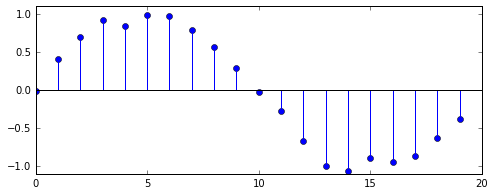

In [10]:
plt.figure(figsize=(8,3))
plt.stem(n,xn)
plt.ylim([-1.1,1.1])
plt.axhline(0,c='k')
plt.show()

## 2.3. Recover Original Signal from Corrupted One 

- Smoothing or noise reduction
- very important in practice

### 2.3.1. Average for Stationary Signals

- sample mean and sample variance

$$
\begin{align}
\bar{x} &=\frac{x_1+x_2+...+x_m}{m}\\
s^2 &=\frac{\sum_{i=1}^{m}(x_i-\bar{x})^2}{m-1} \approx \frac{\sum_{i=1}^{m}(x_i-\bar{x})^2}{m}
\end{align}
$$

- suppose $x \sim U[0,1]$

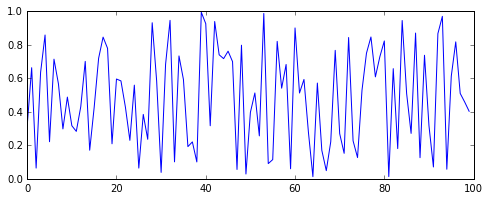

In [11]:
## Statistics
# numerically understand statistics

m = 100;
x = np.random.rand(m) # uniform dist.
plt.figure(figsize=(8,3))
plt.plot(x)
plt.show()

In [12]:
xbar = 1/m*sum(x)                  # sample mean or
print('xbar = '+str(xbar))
print('mean = '+str(np.mean(x)))

varbar = 1/(m-1)*sum((x-xbar)**2)   # sample variance or
print('varbar = '+str(varbar))
print('var = '+str(np.var(x)))

xbar = 0.487521914672
mean = 0.487521914672
varbar = 0.0873469963069
var = 0.0864735263439


- Memory Efficient Implementation (or recursive)

$$ 
\begin{align*}
s[m-1] & = \frac{1}{m-1} \sum_{n=1}^{m-1} x[n] \\
s[m] & = \frac{1}{m} \sum_{n=1}^{m} x[n] = \frac{1}{m} \left( x[n] + \sum_{n=1}^{m-1} x[n] \right)= \frac{1}{m} \left( x[n] + (m-1)s[m-1]\right) \\
&= \frac{1}{m}x[m] + \frac{m-1}{m}s[m-1]
\end{align*} $$

In [13]:
del xbar
s = 0
N = 100

for n in range(N):
    s = (1-1/(n+1))*s + 1/(n+1)*x[n]

print('s = '+str(s))
print('mean = '+str(np.mean(x)))

s = 0.487521914672
mean = 0.487521914672


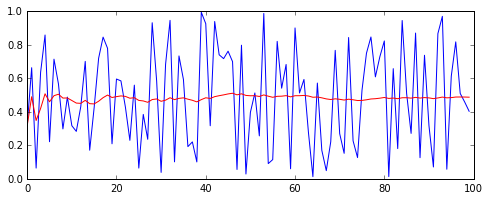

In [14]:
# just to plot

S = np.array([])

for n in range(N):
    s = (1-1/(n+1))*s + 1/(n+1)*x[n]
    S = np.hstack((S,s))

plt.figure(figsize=(8,3))
plt.plot(x)
plt.plot(S,'r')
plt.show()

- for non-stationary signals

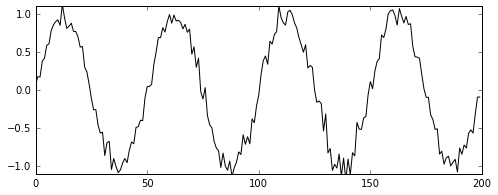

In [15]:
N = 200
n = np.array(range(N))
x = np.sin(2*np.pi/N*n*4);
xn = np.sin(2*np.pi/N*n*4) + 0.1*np.random.randn(N)

plt.figure(figsize=(8,3))
plt.plot(n,xn,'k')
plt.ylim([-1.1,1.1])
plt.show()

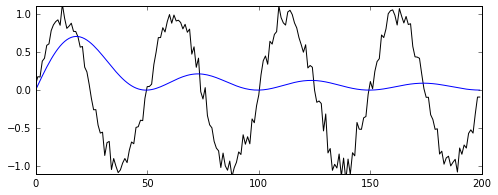

In [16]:
# incorrect

s = 0
S = np.array([])

for n in range(N):
    s = (1-1/(n+1))*s + 1/(n+1)*x[n]
    S = np.hstack((S,s))

plt.figure(figsize=(8,3))
plt.plot(xn,'k')
plt.plot(S)
plt.ylim([-1.1,1.1])
plt.show()

### 2.3.2. Moving Average

- if a window size is 5

$$ 
\begin{align*}
y[n-1] &= \frac{x[n-1] + x[n-2] + x[n-3] + x[n-4] + x[n-5]}{5} \\
y[n] &= \frac{x[n] + x[n-1] + x[n-2] + x[n-3] + x[n-4]}{5}
\end{align*}
$$

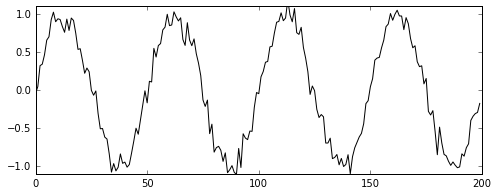

In [17]:
N = 200
n = np.array(range(N))
x = np.sin(2*np.pi/N*n*4)
xn = np.sin(2*np.pi/N*n*4) + 0.1*np.random.randn(N)

plt.figure(figsize=(8,3))
plt.plot(n,xn,'k')
plt.ylim([-1.1,1.1])
plt.show()

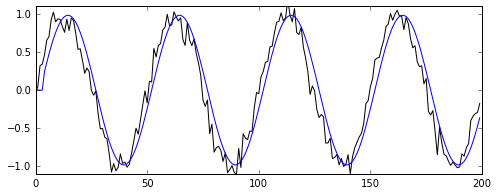

In [18]:
y = np.zeros(len(xn))

for k in range(4,N): 
    y[k] = 1/5*(x[k] + x[k-1] + x[k-2] + x[k-3] + x[k-4])

plt.figure(figsize=(8,3))    
plt.plot(n,xn,'k',n,y)
plt.ylim([-1.1,1.1])
plt.show()

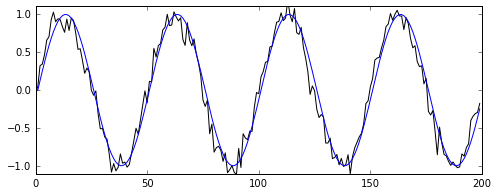

In [19]:
y = np.zeros(len(xn))

m = 3
for k in range(2,N):
    s = 0
    
    for i in range(m):
        s = s + x[k-i]

    y[k] = 1/m*s

plt.figure(figsize=(8,3))
plt.plot(n,xn,'k',n,y)
plt.ylim([-1.1,1.1])
plt.show()

- Memory Efficient Implementation (or recursive)

<br>
$$ 
\begin{align*}
y[n-1] &= \frac{x[n-1] + x[n-2] + x[n-3] + x[n-4] + x[n-5]}{5} \\
y[n] &= \frac{x[n] + x[n-1] + x[n-2] + x[n-3] + x[n-4]}{5}\\
 &= \frac{x[n]}{5} + \frac{x[n-1] + x[n-2] + x[n-3] + x[n-4]}{5} + \frac{x[n-5]}{5} - \frac{x[n-5]}{5}\\
y[n] &= \frac{x[n]}{5} + y[n-1]- \frac{x[n-5]}{5}\\
\end{align*}
$$

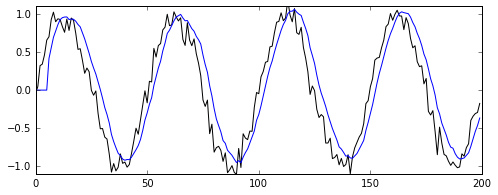

In [20]:
y = np.zeros(len(xn))
m = 7

s = 0
for i in range(m):
    s = s + xn[i]  

y[m-1] = s/(m-1)

for k in range(m,N):
    y[k] = y[k-1] + xn[k]/m - xn[k-m]/m   

plt.figure(figsize=(8,3))
plt.plot(n,xn,'k',n,y)
plt.ylim([-1.1,1.1])
plt.show()

### 2.3.3. Exponential Smoothing (Exponentially Weighted Moving Average)

- To give decreasing weights to all the previous observations

$$ y[n] = (1-\theta) \left(x[n] + \theta x[n-1] + \theta^2 x[n-2] + \cdots + \theta^{n-1} x[1] \right)$$

- Discount factor, $\theta$

- Recursive

$$ 
\begin{align*}
y[n-1] &= (1-\theta) \left(x[n-1] + \theta x[n-2] + \theta^2 x[n-3] + \cdots + \theta^{n-2} x[1] \right)\\
y[n] &= (1-\theta) \left(x[n] + \theta x[n-1] + \theta^2 x[n-2] + \cdots + \theta^{n-1} x[1] \right)\\
& = (1-\theta) x[n] + \theta \, y[n-1]
\end{align*}$$

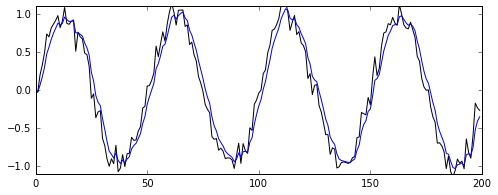

In [21]:
N = 200
n = np.array(range(N))
x = np.sin(2*np.pi/N*n*4)
xn = np.sin(2*np.pi/N*n*4) + 0.1*np.random.randn(N)

theta = 0.6
y = xn[0]
Y = np.array([y])

for k in range(1,N):
    y = (1 - theta)*xn[k] + theta*y
    Y = np.hstack((Y,y))

plt.figure(figsize=(8,3))
plt.plot(n,xn,'k',n,Y)
plt.ylim([-1.1,1.1])
plt.show()

### 2.3.4. Median Filter

<br>
$$ 
y[n] = \text{median}\{x[n], x[n-1], \cdots, x[n-k+1]\}$$

Median filters can do an excellent job of rejecting certain types of noise, in particular, "shot" or impulse noise (outlier in a time series) in which some individual pixels or signals have extreme values.

<br>
<font size='4'><b>Remove shot noise (salt & pepper noise)</b></font>

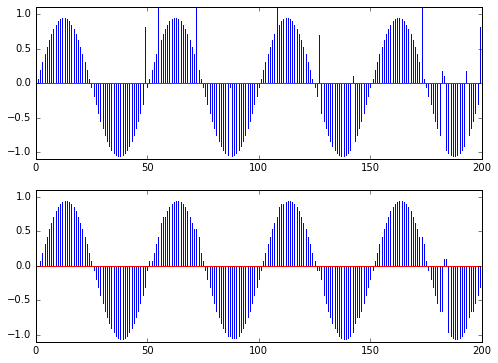

In [15]:
#plot -s 560,420

N = 200
n = np.array(range(200))
x = np.sin(2*np.pi/N*n*4)

shot_noise = (np.random.random(x.shape) < 0.05).astype(int)
xn = x + shot_noise - shot_noise.mean()

y = np.zeros(xn.shape)
m = 3
for k in range(m, N+1):
    A = np.array([])
    for i in range(0, m):
        A = np.hstack((A, xn[k-i-1]))
    y[k-1] = np.median(A)
    
plt.figure(figsize=(8,6))
plt.subplot(2,1,1), plt.stem(n, xn, markerfmt=" "), plt.ylim([-1.1, 1.1])
plt.subplot(2,1,2), plt.stem(n, y , markerfmt=" "), plt.ylim([-1.1, 1.1])
plt.show()

In [41]:
Fs, x = wavfile.read('./data_files/92002_jcveliz_violin-origional.wav')

x = x/max(x)
sd.play(x, Fs)  # play a wave file with sampling rate Fs

In [44]:
# generate an audio signal with a salt and pepper noise
#shot_noise = imnoise(zeros(length(x),1),'salt & pepper',0.05);
shot_noise = (np.random.random(x.shape) < 0.05).astype(int)
#x_noise = x + shot_noise - mean(shot_noise);
x_noise = x + shot_noise - shot_noise.mean()
sd.play(x_noise,Fs)

In [45]:
# apply a linear low-pass filter
h = np.array([1,1,1])/3
x_avg = np.convolve(h,x_noise)
sd.play(x_avg,Fs)

In [39]:
# apply a nonlinear filter
x_median = ndi.median_filter(x_noise,7);
sd.play(x_median,Fs)

## 2.4. Edge Detection

- Detecting sharp changes in signals


- Do not use 
    - difference
    - derivative
    - (why: noise sensitive)


- Do use 
    - sum
    - integral
    - (why: more robust to noise)

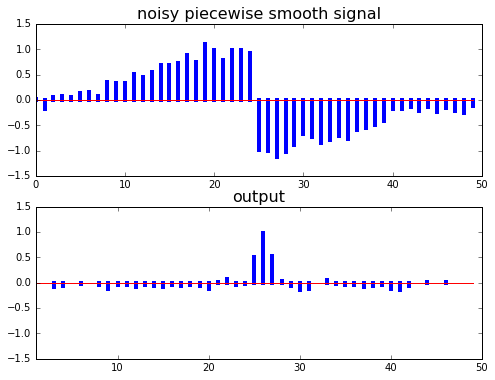

In [88]:
# piecewise smooth signal with a bit of noise added
N = 50
n = range(0, N)
s = np.hamming(N) * np.hstack((np.ones(N//2), -np.ones(N//2)))
x = s + 0.1*np.random.randn(N)

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
mline, sline, bline = plt.stem(n, x, markerfmt=" ")
plt.setp(sline, 'color', 'b', 'linewidth', 4)
plt.title('noisy piecewise smooth signal', fontsize=16)

y = np.zeros(x.shape)
m = 4

for k in range(m, N-1):
    A = np.array([])
    for i in range(0, m):
        A = np.hstack((A, x[k-i-1]))
    y[k-1] = 1/4 * np.dot(np.array([[-1, -1, 1, 1]]), A)

plt.subplot(2,1,2)
_mline, _sline, _bline = plt.stem(n, y, markerfmt=" ")
plt.setp(_sline, 'color', 'b', 'linewidth', 4)
plt.axis([1, N, -1.5, 1.5])
plt.title('output', fontsize=16)

plt.show()

<font size='4'><b>Lab: IMU sensors</b></font>

IMU 센서에서 들어오는 raw signal 에 필터를 적용해서 노이지를 줄이는 실험

# 3. Discrete Time Signals in Frequency Domain (Optional)

## 3.1. FFT

## 3.2. Filters in Frequency Domain

## 3.3. STFT

# 4. Machine Learning 

- Draw a meaningful conclusion, given a set of data (observation, measurement)


-  In 1959, Arthur Samuel defined [machine learning](https://en.wikipedia.org/wiki/Machine_learning) as a "Field of study that gives computers the ability to learn without being explicitly programmed"

    - Often hand programming not possible
    - Solution? Get the computer to program itself, by showing it examples of the behavior we want! This is the _learning_ approach of AI
    - Really, we write the structure of the program and the computer tunes many internal parameters


- Many related terms:
    - Pattern recognition
    - Neural networks $\rightarrow$ Deep learning
    - Data mining
    - Adaptive control
    - Statistical modeling
    - Data analytics / data science
    - Artificial intelligence
    - Machine learning

$\qquad \;$(source: [lecture video](https://www.youtube.com/embed/mgBrXnjF8R4?vq=hd1080&autoplay=1) from The Machine Learning Summer School by [Zoubin Ghahramani](http://mlg.eng.cam.ac.uk/zoubin/), Univ. of Cambridge)


- Matlab: Signal Processing and Machine Learning Techniques for Sensor Data Analytics

 - http://www.mathworks.com/videos/signal-processing-and-machine-learning-techniques-for-sensor-data-analytics-107549.html


## 4.1. Linear regression

A statistical process for estimating the relationships among variables

The goal is to make quantitative (real valued) predictions on the basis of a (vector of) features or attributes

Begin by considering linear regression (easy to extend to more comlex predictions later on)

- $\text{Given} \; \begin{cases}
x_{i} \; \text{: inputs} \\
y_{i} \; \text{: outputs}
\end{cases}$
, Find $\theta_{1}$ and $\theta_{2}$


$$x=
\begin{bmatrix}
x_{1} \\
x_{2} \\
\vdots \\
x_{m}
\end{bmatrix}, \qquad
y=
\begin{bmatrix}
y_{1} \\
y_{2} \\
\vdots \\
y_{m}
\end{bmatrix} \approx
\hat{y}_{i} = \theta_{1}x_{i} + \theta_{2} $$


- $ \hat{y}_{i} $ : predicted output 


- $ \theta = 
\begin{bmatrix}
\theta_{1} \\
\theta_{2} \\
\end{bmatrix}
$ : Model parameters

$$ \hat{y}_{i} = f(x_{i}, \theta) \; \text{ in general}$$

- in many cases, a linear model to predict $y_{i}$ used


$$ \hat{y}_{i} = \theta_{1}x_{i} + \theta_{2} \; \text{  such that  } \min\limits_{\theta_{1}, \theta_{2}}\sum\limits_{i = 1}^{m} \left(\hat{y}_{i} - y_{i} \right)^2$$

<br>

<table style="border-style: hidden; border-collapse: collapse;" width = "90%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 45% style="border-style: hidden; border-collapse: collapse;">
             <img src="./image_files/linear_regression02.jpg", width = 350>
        </td>
        <td width = 45%>
            <img src="./image_files/linear_regression.png", width = 350>
        </td>
    </tr>
</table>

<font size='4'><b>Re-cast problem as a least squares</b></font>

- For convenience, we define a function that maps inputs to feature vectors, $\phi$

$$\begin{array}{Icr}\begin{align*} \hat{y}_{i}
& = \begin{bmatrix}x_{i} & 1\end{bmatrix}\begin{bmatrix}\theta_{1} \\ \theta_{2}\end{bmatrix} \\
& =\begin{bmatrix}x_{i} \\1\end{bmatrix}^{T}\begin{bmatrix}\theta_{1} \\ \theta_{2}\end{bmatrix} \\
& =\phi^{T}(x_{i})\theta
\end{align*}\end{array}
\begin{array}{Icr}
\quad \quad \text{feature vector}
\; \phi(x_{i}) = \begin{bmatrix}x_{i} \\1\end{bmatrix}
\end{array}$$

<br>

$$\Phi = \begin{bmatrix}x_{1} & 1 \\x_{2} & 1 \\ \vdots \\x_{m} & 1 \end{bmatrix}=\begin{bmatrix}\phi(x_{1})^T \\\phi(x_{2})^T \\\vdots \\\phi(x_{m})^T \end{bmatrix} \quad \implies \quad \hat{y} = \begin{bmatrix}\hat{y}_{1} \\\hat{y}_{2} \\\vdots \\\hat{y}_{m}\end{bmatrix}=\Phi\theta$$

<br>
- optimization problem

$$\min\limits_{\theta_{1}, \theta_{2}}\sum\limits_{i = 1}^{m} (\hat{y}_{i} - y_{i})^2
=\min\limits_{\theta}\lVert\Phi\theta-y\rVert^2_2
\qquad \qquad  (\text{same as} \; \min_{x} \lVert Ax-b \rVert_2^2)$$

$$ \text{solution} \;
\theta^* = (\Phi^{T}\Phi)^{-1}\Phi^{T}y
$$

<br>
<font size='4'><b>Note</b></font>

$$\begin{array}{Icr} \text{input} \\ x_{i} \end{array}
\quad \rightarrow \quad
\begin{array}{Icr} \text{feature} \\ \begin{bmatrix}x_{i} \\1 \end{bmatrix} \end{array}
\quad \rightarrow \quad
\begin{array}{Icr} \text{predicted output} \\ \hat{y}_{i} \end{array}$$

<br>

$$\begin{array}{Icr}
\begin{bmatrix}x_{1} & 1 \\x_{2} & 1\\\vdots & \vdots\\x_{m} & 1\end{bmatrix}\begin{bmatrix}\theta_1\\\theta_2\end{bmatrix}=\begin{bmatrix}y_{1} \\y_{2} \\\vdots \\y_{m}\end{bmatrix} \\
\begin{array}{Icr} \uparrow \\ \vec{a}_1 \end{array}
\;\;
\begin{array}{Icr} \uparrow \\ \vec{a}_2 \end{array}
\quad
\begin{array}{Icr} \uparrow \\ \vec{x} \end{array}
\quad\quad \;\;
\begin{array}{Icr} \uparrow \\ \vec{b} \end{array}
\end{array}
\quad
\begin{array}{Icr}
\quad \text{over-determined or} \\
\quad \text{projection}
\end{array}$$

<br>

$$A(= \Phi) = \left[ \vec{a}_1 \;\vec{a}_2 \right]$$

Then we can use a linear algebra
- known as _least square_

$$ \theta = (A^TA)^{-1}A^T y $$

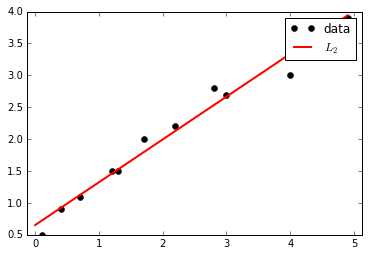

In [117]:
# data points in column vector [input, output]
x = np.array([[0.1, 0.4, 0.7, 1.2, 1.3, 1.7, 2.2, 2.8, 3.0, 4.0, 4.3, 4.4, 4.9]]).T
y = np.array([[0.5, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.8, 2.7, 3.0, 3.5, 3.7, 3.9]]).T

m = len(y)
A = np.hstack((x, np.ones((m, 1))))

theta = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)

## to plot
plt.plot(x, y, 'ko')

# to plot a straight line (fitted line)
xp = np.arange(0, 5, 0.1)
yp = theta[0]*xp + theta[1];

plt.plot(xp, yp, 'r', linewidth=2)
plt.axis('equal')
plt.legend(['data', '$L_{2}$']);
plt.show()

## 4.2. Demo

- acceleration calibration example

- location from distance or phase

# 5. Linear Classification

# 6. Lab: Sound + Delta robot in python, FFT

with a robot from http://www.robot-army.com/

In [60]:
%%html
<iframe src="https://www.youtube.com/embed/AwHTOyvZh3c" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

In [61]:
%%html
<iframe src="https://www.youtube.com/embed/snMTiPywoiM?list=PLBD_gON7g_m3th-gxjQRma1z-1Cc8M7t4" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

In [8]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>